In [1]:
# In this exercise we'll examine a learner which has high bias, and is incapable of
# learning the patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.

from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold
import numpy as np

D:\Code\Anaconda3\envs\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Code\Anaconda3\envs\Anaconda2\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

In [3]:
# Create a series of data that forces a learner to have high bias
X = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])

print "X:\n", X[:5]
print ""
print "y:\n", y[:5]

X:
[[ 2.03162355]
 [-0.1737484 ]
 [-1.53061912]
 [-0.85643646]
 [-1.24222388]]

y:
[[ 1.06424714]
 [ 1.3776853 ]
 [ 6.40403311]
 [ 3.44635633]
 [ 5.02756794]]


In [4]:
def plot_curve():
    reg = LinearRegression()
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need 'size', 'cv' and 'score' from above.
    
    training_sizes, training_scores, testing_scores = learning_curve(reg, X, y, cv=cv, scoring=score)

    # TODO: Plot the training curves and the testing curves
    #       Use plt.plot twice -- one for each score. Be sure to give them labels!
    plt.plot(training_sizes, training_scores, "o-", color="r", label="Training Score")
    plt.plot(training_sizes, testing_scores, "o-", color="g", label="Testing Score")
    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()

Regressor score: 0.3764


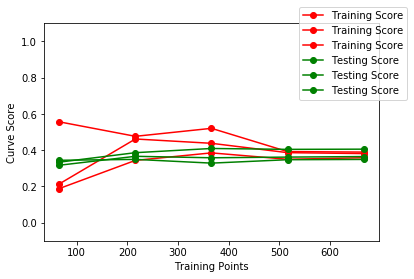

In [5]:
plot_curve()